# Initial Value Problems - Project

![Initial condition of firework with FBD and sum of momentum](../images/firework.png)

You are going to end this module with a __bang__ by looking at the
flight path of a firework. Shown above is the initial condition of a
firework, the _Freedom Flyer_ in (a), its final height where it
detonates in (b), the applied forces in the __Free Body Diagram (FBD)__
in (c), and the __momentum__ of the firework $m\mathbf{v}$ and the
propellent $dm \mathbf{u}$ in (d). 

The resulting equation of motion is that the acceleration is
proportional to the speed of the propellent and the mass rate change
$\frac{dm}{dt}$ as such

$$\begin{equation}
m\frac{dv}{dt} = u\frac{dm}{dt} -mg - cv^2.~~~~~~~~(1)
\end{equation}$$

If you assume that the acceleration and the propellent momentum are much
greater than the forces of gravity and drag, then the equation is
simplified to the conservation of momentum. A further simplification is
that the speed of the propellant is constant, $u=constant$, then the
equation can be integrated to obtain an analytical rocket equation
solution of [Tsiolkovsky](https://www.math24.net/rocket-motion/) [1,2], 

$$\begin{equation}
m\frac{dv}{dt} = u\frac{dm}{dt}~~~~~(2.a)
\end{equation}$$

$$\begin{equation}
\frac{m_{f}}{m_{0}}=e^{-\Delta v / u},~~~~~(2.b) 
\end{equation}$$

where $m_f$ and $m_0$ are the mass at beginning and end of flight, $u$
is the speed of the propellent, and $\Delta v=v_{final}-v_{initial}$ is
the change in speed of the rocket from beginning to end of flight.
Equation 2.b only relates the final velocity to the change in mass and
propellent speed. When you integrate Eqn 2.a, you will have to compare
the velocity as a function of mass loss. 

Your first objective is to integrate a numerical model that converges to
equation (2.b), the Tsiolkovsky equation. Next, you will add drag and
gravity and compare the results _between equations (1) and (2)_.
Finally, you will vary the mass change rate to achieve the desired
detonation height.

__1.__ Create a `simplerocket` function that returns the velocity, $v$,
the acceleration, $a$, and the mass rate change $\frac{dm}{dt}$, as a
function of the $state = [position,~velocity,~mass] = [y,~v,~m]$ using
eqn (2.a). Where the mass rate change $\frac{dm}{dt}$ and the propellent
speed $u$ are constants. The average velocity of gun powder propellent
used in firework rockets is $u=250$ m/s [3,4]. 

$\frac{d~state}{dt} = f(state)$

$\left[\begin{array}{c} v\\a\\ \frac{dm}{dt} \end{array}\right] = \left[\begin{array}{c} v\\ \frac{u}{m}\frac{dm}{dt} \\ \frac{dm}{dt} \end{array}\right]$

Use [an integration method](../module_03/03_Get_Oscillations) to
integrate the `simplerocket` function. Demonstrate that your solution
converges to equation (2.b) the Tsiolkovsky equation. Use an initial
state of y=0 m, v=0 m/s, and m=0.25 kg. 

Integrate the function until mass, $m_{f}=0.05~kg$, using a mass rate change of $\frac{dm}{dt}=0.05$ kg/s. 

> __Hint__: your integrated solution will have a current mass that you can
> use to create $\frac{m_{f}}{m_{0}}$ by dividing state[2]/(initial mass),
> then your plot of velocity(t) vs mass(t)/mass(0) should match
> Tsiolkovsky's
> 
> $\log\left(\frac{m_{f}}{m_{0}}\right) =
> \log\left(\frac{state[2]}{0.25~kg}\right) 
> = \frac{state[1]}{250~m/s} = \frac{-\Delta v+error}{u}$ 
> where $error$ is the difference between your integrated state variable
> and the Tsiolkovsky analytical value.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
def simplerocket(state,dmdt=0.05, u=250):
    '''Computes the right-hand side of the differential equation
    for the acceleration of a rocket, without drag or gravity, in SI units.
    
    Arguments
    ----------    
    state : array of three dependent variables [y v m]^T
    dmdt : mass rate change of rocket in kilograms/s default set to 0.05 kg/s
    u    : speed of propellent expelled (default is 250 m/s)
    
    Returns
    -------
    derivs: array of three derivatives [v (u/m*dmdt-g-c/mv^2) -dmdt]^T
    '''
    
    dstate = np.zeros(np.shape(state))
    dstate[0] = state[1]
    dstate[1] = (u*dmdt) / state[2]
    dstate[2] = -dmdt

    return dstate

In [3]:
m0=0.25
mf=0.05
dm=0.05
N = 500
t = np.linspace(0,(m0-mf)/dm,N)
dt=t[1]-t[0]

In [4]:
def euler_step(state,rhs,dt):
    next_state = state + rhs(state) * dt
    return next_state

In [5]:
x0 = 0
v0 = 0
m0 = 0.25

num_sol = np.zeros([N,3])

num_sol[0,0] = x0
num_sol[0,1] = v0
num_sol[0,2] = m0

for i in range(N-1):
    num_sol[i+1] = euler_step(num_sol[i], simplerocket, dt)

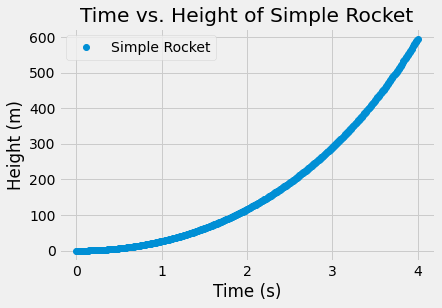

In [6]:
plt.plot(t, num_sol[:,0], 'o', label='Simple Rocket')
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Time vs. Height of Simple Rocket')
plt.legend();

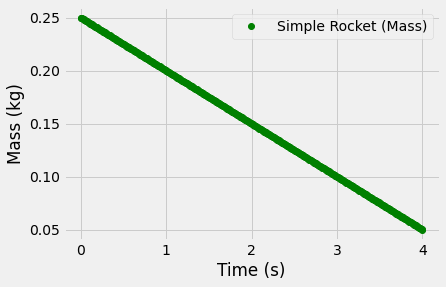

In [7]:
plt.plot(t, num_sol[:,2], 'o', color = 'green', label = 'Simple Rocket (Mass)')
plt.xlabel('Time (s)')
plt.ylabel('Mass (kg)')
plt.legend();

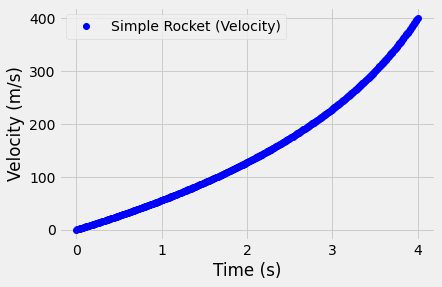

In [8]:
plt.plot(t, num_sol[:,1], 'o', color = 'blue', label = 'Simple Rocket (Velocity)')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.legend();

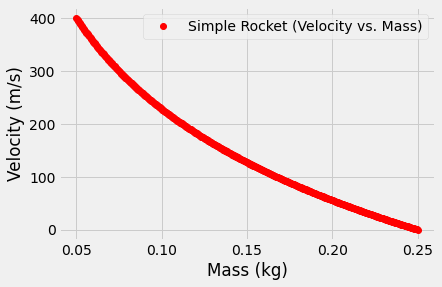

In [9]:
plt.plot(num_sol[:,2], num_sol[:,1], 'o', color = 'red', label = 'Simple Rocket (Velocity vs. Mass)')
plt.xlabel('Mass (kg)')
plt.ylabel('Velocity (m/s)')
plt.legend();

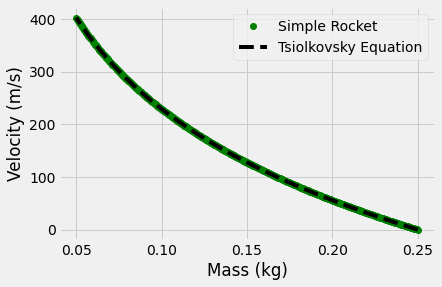

In [10]:
m0 = 0.25
mf = 0.05
dm = 0.05
u = 250
Tsiolkovsky = -u * np.log(num_sol[:,2]/m0)

plt.plot(num_sol[:,2], num_sol[:,1], 'o', color = 'green', label = 'Simple Rocket')
plt.plot(num_sol[:,2], Tsiolkovsky, '--', color = 'black', label = 'Tsiolkovsky Equation')
plt.xlabel('Mass (kg)')
plt.ylabel('Velocity (m/s)')
plt.legend();

In [11]:
print(Tsiolkovsky[-1])
print(num_sol[-1,1])

402.3594781085134
401.559160028918


In [12]:
N_values = np.array([20,50,100,200,400,800,1600,3200,6400,12800,64000,128000,640000])

num_sol_time = np.empty_like(N_values, dtype=np.ndarray)

for j, N in enumerate(N_values):
    m0=0.25
    mf=0.05
    dm=0.05
    t = np.linspace(0,(m0-mf)/dm,N)
    dt=t[1]-t[0]
    
    x0 = 0
    v0 = 0

    num_sol = np.zeros([N,3])

    num_sol[0,0] = x0
    num_sol[0,1] = v0
    num_sol[0,2] = m0

    for i in range(N-1):
        num_sol[i+1] = euler_step(num_sol[i], simplerocket, dt)

    num_sol_time[j] = num_sol.copy()

In [13]:
def get_error(num_sol):
    
    x_an = Tsiolkovsky[-1] # analytical solution at final time
    
    error =  np.abs(num_sol[-1,1] - x_an)
    
    return error

In [14]:
error_values = np.zeros(len(N_values))

for j in range(len(N_values)):
    
    error_values[j] = get_error(num_sol_time[j])

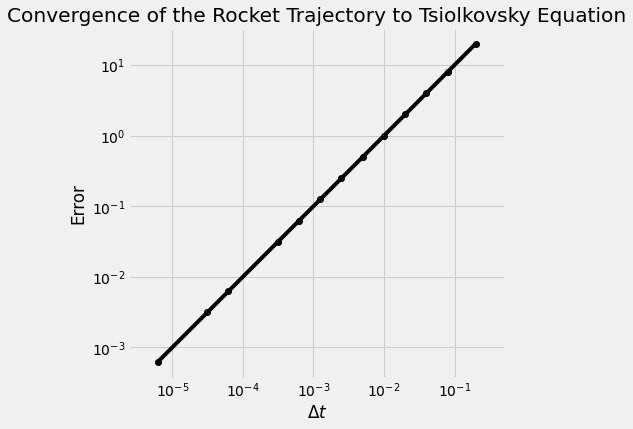

In [15]:
fig = plt.figure(figsize=(6,6))

plt.loglog(((m0-mf)/dm)/N_values, error_values, 'ko-')  
plt.grid(True)
plt.axis('equal')                     
plt.xlabel('$\Delta t$')
plt.ylabel('Error')
plt.title('Convergence of the Rocket Trajectory to Tsiolkovsky Equation');

The plot above shows that as the time step decreases, the rocket trajectory found using the Euler method converges towards the Tsiolkovsky Equation of rocket motion.

The slope of this plot shows that the Euler method is a first-order method, which we know from previous modules

__2.__ You should have a converged solution for integrating `simplerocket`. Now, create a more relastic function, `rocket` that incorporates gravity and drag and returns the velocity, $v$, the acceleration, $a$, and the mass rate change $\frac{dm}{dt}$, as a function of the $state = [position,~velocity,~mass] = [y,~v,~m]$ using eqn (1). Where the mass rate change $\frac{dm}{dt}$ and the propellent speed $u$ are constants. The average velocity of gun powder propellent used in firework rockets is $u=250$ m/s [3,4]. 

$\frac{d~state}{dt} = f(state)$

$\left[\begin{array}{c} v\\a\\ \frac{dm}{dt} \end{array}\right] = 
\left[\begin{array}{c} v\\ \frac{u}{m}\frac{dm}{dt}-g-\frac{c}{m}v^2 \\ \frac{dm}{dt} \end{array}\right]$

Use [two integration methods](../notebooks/03_Get_Oscillations.ipynb) to integrate the `rocket` function, one explicit method and one implicit method. Demonstrate that the solutions converge to equation (2.b) the Tsiolkovsky equation. Use an initial state of y=0 m, v=0 m/s, and m=0.25 kg. 

Integrate the function until mass, $m_{f}=0.05~kg$, using a mass rate change of $\frac{dm}{dt}=0.05$ kg/s, . 

Compare solutions between the `simplerocket` and `rocket` integration, what is the height reached when the mass reaches $m_{f} = 0.05~kg?$

In [16]:
def rocket(state,dmdt=0.05, u=250,c=0.18e-3):
    '''Computes the right-hand side of the differential equation
    for the acceleration of a rocket, with drag, in SI units.
    
    Arguments
    ----------    
    state : array of three dependent variables [y v m]^T
    dmdt : mass rate change of rocket in kilograms/s default set to 0.05 kg/s
    u    : speed of propellent expelled (default is 250 m/s)
    c : drag constant for a rocket set to 0.18e-3 kg/m
    Returns
    -------
    derivs: array of three derivatives [v (u/m*dmdt-g-c/mv^2) -dmdt]^T
    '''
    g=9.81
    dstate = np.zeros(np.shape(state))
    dstate[0] = state[1]
    dstate[1] = (u/state[2] * dmdt) - (g) - (c/(state[2])*state[1]**2)
    dstate[2] = -dmdt
    return dstate

In [17]:
x0 = 0
v0 = 0
m0 = 0.25
u = 250
N = 500

t = np.linspace(0, (m0-mf)/dm, N)
dt = t[1]-t[0]

num_sold = np.zeros([N,3])
num_sold[0,0] = x0
num_sold[0,1] = v0
num_sold[0,2] = m0

for i in range(N-1):
    num_sold[i+1] = euler_step(num_sold[i], rocket, dt)

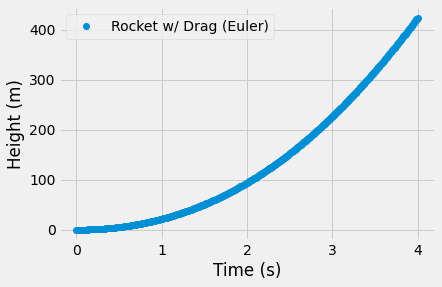

In [18]:
plt.plot(t, num_sold[:,0], 'o', label = 'Rocket w/ Drag (Euler)')
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.legend();

In [19]:
def heun_step(state,rhs,dt,etol=0.000001,maxiters = 100):
    e=1
    eps = np.finfo('float64').eps
    next_state = state + rhs(state)*dt
    for n in range(0,maxiters):
        next_state_old = next_state
        next_state = state + (rhs(state)+rhs(next_state))/2*dt
        e = np.sum(np.abs(next_state-next_state_old)/np.abs(next_state+eps))
        if e<etol:
            break
        return next_state

In [20]:
t = np.linspace(0,(m0-mf)/dm,N)
dt = t[1] - t[0]
num_solh = np.zeros([N,3])
num_solh[0,0] = x0
num_solh[0,1] = v0
num_solh[0,2] = m0
for i in range(N-1):
    num_solh[i+1] = heun_step(num_solh[i], rocket, dt)

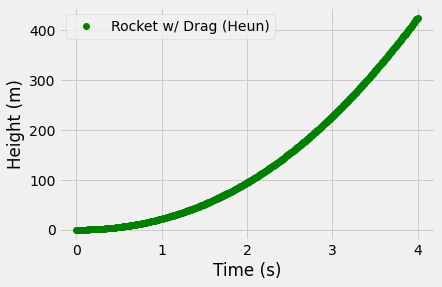

In [21]:
plt.plot(t, num_solh[:,0], 'o', color = 'green', label = 'Rocket w/ Drag (Heun)')
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.legend();

ValueError: x and y must have same first dimension, but have shapes (640000,) and (500,)

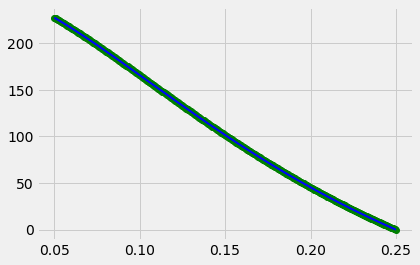

In [22]:
plt.plot(num_sold[:,2], num_sold[:,1], 'o', color = 'green', label = 'Rocket w/ Drag (Euler)')
plt.plot(num_solh[:,2], num_solh[:,1], '-', color = 'blue', linewidth = 2, label = 'Rocket w/ Drag (Heun)')
plt.plot(num_sol[:,2], Tsiolkovsky, '--', color = 'black', label = 'Tsiolkovsky Equation')
plt.xlabel('Mass (kg)')
plt.ylabel('Velocity (m/s)')
plt.legend();

Shown above is a plot of the mass vs. velocity of the rocket, using the various numerical solving methods (EUler and Heun). These two methods produce the same result. We can compare this result to that of the Tsiolkovsky Equation, which makes the assumption that gravity and drag are significantly smaller than the acceleration and momentum of the propellant. However, this plot makes it clear that in this situation, it is not safe to make this assumption. Based on the specifications of the rocket, it is clear that drag and gravity have a significant impact on the flight of the rocket. For example, the velocity of the rocket at a mass of 0.05kg when gravity and drag are taken into account is roughly half of the velocity when these factors are ignored.

In [ ]:
plt.plot(num_sol[:,2], num_sol[:,0], '-', color = 'green', label = 'Simple Rocket (Euler)')
plt.plot(num_sold[:,2], num_sold[:,0], '-', color = 'blue', label = 'Rocket w/ Drag & Grav. (Euler)')
plt.xlabel('Mass (kg)')
plt.ylabel('Height (m)')
plt.legend();

__3.__ Solve for the mass change rate that results in detonation at a height of 300 meters. Create a function `f_dm` that returns the final height of the firework when it reaches $m_{f}=0.05~kg$. The inputs should be 

$f_{m}= f_{m}(\frac{dm}{dt},~parameters)$

where $\frac{dm}{dt}$ is the variable you are using to find a root and $parameters$ are the known values, `m0=0.25, c=0.18e-3, u=250`. When $f_{m}(\frac{dm}{dt}) = 0$, you have found the correct root. 

Plot the height as a function of time and use a star to denote detonation at the correct height with a `'*'`-marker

Approach the solution in two steps, use the incremental search
[`incsearch`](../module_03/04_Getting_to_the_root) with 5-10
sub-intervals _limit the number of times you call the
function_. Then, use the modified secant method to find the true root of
the function.

a. Use the incremental search to find the two closest mass change rates within the interval $\frac{dm}{dt}=0.05-0.4~kg/s.$

b. Use the modified secant method to find the root of the function $f_{m}$.

c. Plot your solution for the height as a function of time and indicate the detonation with a `*`-marker.

In [ ]:
from scipy.integrate import solve_ivp

In [ ]:
def f_dm(dmdt, m0 = 0.25, c = 0.18e-3, u = 250):
    ''' define a function f_dm(dmdt) that returns 
    height_desired-height_predicted[-1]
    here, the time span is based upon the value of dmdt
    
    arguments:
    ---------
    dmdt: the unknown mass change rate
    m0: the known initial mass
    c: the known drag in kg/m
    u: the known speed of the propellent
    
    returns:
    --------
    error: the difference between height_desired and height_predicted[-1]
        when f_dm(dmdt) = 0, the correct mass change rate was chosen
    '''
    mf = 0.05
    tmin = 0
    tmax = abs(mf-m0)/dmdt
    sol = solve_ivp(lambda t, y:rocket(y,dmdt=dmdt), [tmin,tmax],[0,0,m0])
    maxheight = sol.y[0,-1]
    error = maxheight - 300
    return error

In [ ]:
def incsearch(func,xmin,xmax,ns=50):
    '''incsearch: incremental search root locator
    xb = incsearch(func,xmin,xmax,ns):
      finds brackets of x that contain sign changes
      of a function on an interval
    arguments:
    ---------
    func = name of function
    xmin, xmax = endpoints of interval
    ns = number of subintervals (default = 50)
    returns:
    ---------
    xb(k,1) is the lower bound of the kth sign change
    xb(k,2) is the upper bound of the kth sign change
    If no brackets found, xb = [].'''

    x = np.linspace(xmin,xmax,ns)
    f = np.zeros(len(x))
    for i in range(len(x)):
        f[i] = func(x[i])
    f = np.array([func(xi) for xi in x])
    sign_f = np.sign(f)
    delta_sign_f = sign_f[1:]-sign_f[0:-1]
    i_zeros = np.nonzero(delta_sign_f!=0)
    nb = len(i_zeros[0])
    xb = np.block([[ x[i_zeros[0]+1]],[x[i_zeros[0]] ]] )

    if nb==0:
      print('no brackets found\n')
      print('check interval or increase ns\n')
    else:
      print('number of brackets:  {}\n'.format(nb))
    return xb

In [ ]:
dm = np.linspace(0.05,0.4)
dm2 = np.linspace(0.05,0.1)
f_dm_ar = np.array([f_dm(dmi) for dmi in dm])
xa_dm = incsearch(f_dm,0.01,0.5, ns=500)

In [ ]:
plt.plot(dm, f_dm_ar+300)
plt.plot(xa_dm, [f_dm(xa_dmi)+300 for xa_dmi in xa_dm], 's')
plt.xlabel('Mass rate (kg/s)')
plt.ylabel('Height (m)')
plt.title('Rocket Trajectory with Drag + Grav');

Above is the plot of mass rate vs. detonation height. In order to limit the number of times the function is called, as well as make the plot easier for viewing, the process is repeated with a smaller interval of mass rates, from 0.05 to 0.1 kg/s. This plot is shown below.

In [ ]:
dm2 = np.linspace(0.05,0.1)
f_dm_ar2 = np.array([f_dm(dmi) for dmi in dm2])
xa_dm2 = incsearch(f_dm,0.01,0.5, ns=500)
plt.plot(dm2, f_dm_ar2+300)
plt.plot(xa_dm2, [f_dm(xa_dmi)+300 for xa_dmi in xa_dm2], 's')
plt.xlabel('Mass rate (kg/s)')
plt.ylabel('Height (m)')
plt.title('Rocket Trajectory with Drag + Grav');

In [ ]:
def mod_secant(func,dx,x0,es=0.0001,maxit=50):
    '''mod_secant: Modified secant root location zeroes
    root,[fx,ea,iter]=mod_secant(func,dfunc,xr,es,maxit,p1,p2,...):
    uses modified secant method to find the root of func
    arguments:
    ----------
    func = name of function
    dx = perturbation fraction
    xr = initial guess
    es = desired relative error (default = 0.0001 )
    maxit = maximum allowable iterations (default = 50)
    p1,p2,... = additional parameters used by function
    returns:
    --------
    root = real root
    fx = func evaluated at root
    ea = approximate relative error ( )
    iter = number of iterations'''

    iter = 0;
    xr=x0
    for iter in range(0,maxit):
        xrold = xr;
        dfunc=(func(xr+dx)-func(xr))/dx;
        xr = xr - func(xr)/dfunc;
        if xr != 0:
            ea = abs((xr - xrold)/xr) * 100;
        else:
            ea = abs((xr - xrold)/1) * 100;
        if ea <= es:
            break
    return xr,[func(xr),ea,iter]

In [ ]:
correct_dm = mod_secant(f_dm, 0.01, 0.05)[0]
print('The correct mass rate is {:.8f} kg/s'.format(correct_dm))
plt.plot(dm2,f_dm_ar2+300)
plt.plot(correct_dm,f_dm(correct_dm)+300,'s')
plt.xlabel('Mass rate (kg/s)')
plt.ylabel('Height (m)')
plt.title('Rocket Trajectory with Drag + Grav');

In [ ]:
dm = correct_dm
m0 = 0.25
mf = 0.05

In [ ]:
def rocket(state,dmdt=dm, u=250,c=0.18e-3):
    g=9.81
    dstate = np.zeros(np.shape(state))
    dstate[0] = state[1]
    dstate[1] = (u/state[2] * dmdt) - (g) - (c/(state[2])*state[1]**2)
    dstate[2] = -dmdt
    return dstate

In [ ]:
t = np.linspace(0,(m0-mf)/dm,N)
dt = t[1] - t[0]
num_solh = np.zeros([N,3])
num_solh[0,0] = x0
num_solh[0,1] = v0
num_solh[0,2] = m0
for i in range(N-1):
    num_solh[i+1] = heun_step(num_solh[i], rocket, dt)

In [ ]:
plt.plot(t, num_solh[:,0], '--', color = 'red', label = 'Rocket w/ Drag (Heun)')
plt.plot(t[-1], num_solh[-1][0], '*', markersize = 25, label = 'Explosion')
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.legend();

## References

1. Math 24 _Rocket Motion_. <https://www.math24.net/rocket-motion/\>

2. Kasdin and Paley. _Engineering Dynamics_. [ch 6-Linear Momentum of a Multiparticle System pp234-235](https://www.jstor.org/stable/j.ctvcm4ggj.9) Princeton University Press 

3. <https://en.wikipedia.org/wiki/Specific_impulse>

4. <https://www.apogeerockets.com/Rocket_Motors/Estes_Motors/13mm_Motors/Estes_13mm_1_4A3-3T>